# Índice

1. [Introducción al Proyecto](#1.-Introducción-al-Proyecto)  
2. [Explicación del LoL](#2.-Explicación-del-LoL)  
3. [Variables del CSV](#2.-Variables-del-CSV)  
4. [Librerias y Funciones](#4.-Librerias-y-Funciones)  
5. [Lectura de los datos](#5.-Lectura-de-los-datos) 
6. [Modelo](#6.-Modelo)  
    

# 1. Introducción al Proyecto

Proyecto de Machine Learning en el que se busca entrenar un modelo capaz de predecir de la mejor forma posible la victoria del equipo azul en una partida de LoL (League of Legends). 

Para hacer esto, se van a utilizar dos conjuntos de datos extraidos de Kaggle, uno perteneciente a partidas hasta el minuto 10 y otro hasta el minuto 15 (las partidas duran entre 25-40 min).

Los resultados de ambas predicciones se van a comparar entre sí, para ver que modelo obtiene mejores resultados.

Los datos se han obtenido de:  
https://www.kaggle.com/datasets/gyejr95/league-of-legends-challenger-rank-game10min15min

**En este Notebook sólo se encuentra el modelo definitivo, el que mejor resultado ha dado después de probar diferentes modelos de ML, de redes neuronales y diferentes formas de tratar los datos.**

# 2. Explicación del LoL

El League of Legends (LoL) es un juego en línea de estrategia en tiempo real y multijugador masivo en línea (MMO). Fue desarrollado y publicado por Riot Games en 2009.

El LoL tiene varios modos de juego, siendo el más famoso y habitual el modo 5v5, en el que dos equipos de cinco jugadores cada uno compiten en un mapa llamado "la Grieta del Invocador" (Summoner's Rift en inglés).

En el juego, los jugadores asumen el papel de "invocadores" que controlan a un equipo de personajes llamados "campeones" con habilidades únicas y diferentes roles en el juego, como atacantes, tanques, magos, etc. El objetivo del juego es destruir la base enemiga, que se encuentra en la esquina opuesta del campo de batalla.

![Mapa LoL](https://kayranorth.com/wp-content/uploads/2021/02/MapaLol.jpg)


Para llegar a la base enemiga, los equipos deben avanzar por tres "calles" (calle superior, calle central y calle inferior) que conectan las dos bases. A lo largo de estas calles hay torres defensivas y inhibidores que protegen la base enemiga. Los equipos deben destruir estas torres y los inhibidores para poder avanzar hacia la base enemiga y destruirla.

Además de las torres y los inhibidores, hay otros elementos importantes en el juego, como los dragones, el heraldo y los minions. Los dragones son criaturas poderosas que se encuentran en una cueva al sureste y al suroeste del mapa. Hay diferentes tipos de dragones en el juego, cada uno otorgando beneficios únicos al equipo que lo mate.

![Dragones LoL](https://www.global-esports.news/wp-content/uploads/2021/08/%E2%80%8EElder-Dragon-and-Dragon-Soul.jpg)


El Heraldo es una criatura poderosa que aparece en una cueva al norte del mapa y es especialmente útil para hacer presión en una calle y forzar al equipo enemigo a responder.

![Heraldo LoL](https://i.blogs.es/d3472b/rift_herald/840_560.jpg)

Los minions son unidades controladas por la IA que aparecen periódicamente en la base de cada equipo y avanzan por las calles hacia la base enemiga. Los jugadores pueden matar a los minions para ganar oro y experiencia.

![Minion LoL](https://cdn.sanity.io/images/ccckgjf9/production/30aef4c7a7d44843b38f283fc90fe36cf50954cb-581x315.png?max-h=1080&max-w=1920&fit=scale&auto=format)

AL comienzo de la partida, los jugadores comienzan en una "fuente" (spawn en inglés) ubicada en la base de su equipo. Aquí pueden comprar objetos con oro que se gana al matar a los minions y a los campeones enemigos. Los jugadores pueden elegir entre varias filas o "roles" para jugar, como atacante, tanque, mago, soporte o asesino, cada uno con habilidades únicas que se adaptan a diferentes estrategias de juego.

Cada partida de LoL dura entre 20 y 50 minutos, dependiendo del nivel de habilidad de los jugadores y de la estrategia utilizada por cada equipo. Los jugadores deben trabajar juntos, comunicarse y coordinarse para asegurarse de que cada uno de ellos esté cumpliendo su rol y para aprovechar las debilidades del equipo enemigo.

# 2.1. Ligas de LoL

En League of Legends, las ligas son una forma de medir la habilidad de un jugador en el juego.

Las ligas se dividen en siete niveles: hierro, bronce, plata, oro, platino, diamante y maestro/gran maestro. Dentro de cada liga, los jugadores tienen una clasificación específica, que se mide en puntos de clasificación o "ELO".

Para subir de liga, los jugadores deben ganar partidas y acumular puntos de clasificación. Cada liga tiene diferentes requisitos de puntuación para subir de nivel, y los jugadores que ganan suficientes partidas y alcanzan la puntuación requerida pueden subir de liga.

Cada temporada, los jugadores tienen la oportunidad de competir en las clasificatorias para subir de liga y mejorar su clasificación. Las clasificatorias son un período de tiempo limitado en el que los jugadores pueden jugar partidas para mejorar su puntaje de clasificación y ganar recompensas exclusivas.

![Ligas LoL](https://i.blogs.es/6d8bf7/ligas/450_1000.jpg)

Los datos del proyecto pertenecen a partidas de liga Challenger, es decir, el nivel más alto.

# 3. Variables del CSV

Ambos Dataset están formados inicialmente por 51 columnas (se añaden varias con la limpieza de las columnas categóricas), de las cuales 1 hace referencia al ID de la partida, para poder utilizarlo en la API de Riot Game (en caso de que se quisiera), y el resto (50) son los datos de la partida para cada equipo, teniendo 25 columnas duplicadas, unas para el equipo azul y las otras para el equipo rojo. Entre estas 25 están las que determinan la victoria para cada equipo, siendo el target duplicado.


La columna que no es de ningun equipo:
* **gameId**: ID de la partida. Se puede utilizar con la API de Riot Games  

Las columnas para el equipo azul son:
* **blueWins**: Columna Target. 1 si gana el equipo azul, 0 si gana el rojo 
* **blueTotalGolds**: Oro total conseguido por el equipo azul  
* **blueCurrentGolds**: Oro conseguido por el equipo azul en ese minuto de la partida 
* **blueTotalLevel**: Suma del nivel de todos los campeones del equipo azul en ese minuto de la partida 
* **blueAvgLevel**: Nivel medio de los campeones del equipo azul  
* **blueTotalMinionKills**: Total de súbditos (minions) eliminados por el equipo azul  
* **blueTotalJungleMinionKills**: Total de monstruos de la jungla eliminados por el equipo azul  
* **blueFirstBlood**: Primera muerte de la partida. 1 si el equipo azul realizó la primera muerte, 0 en caso contrario.  
* **blueKill**: Número de enemigos abatidos por el equipo azul  
* **blueDeath**: Número de veces que han muerto los jugadores del equipo azul  
* **blueAssist**: Número de "asistencias" en los enemigos abatidos por el equipo azul  
* **blueWardPlaced**: Número de tótems de protección (visión) colocados por el equipo azul en el mapa  
* **blueWardKills**: Número de tótems de protección (visión) colocados por el equipo rojo que el equipo azul ha destruido  
* **blueFirstTower**: Primera torre destruida de la partida. 1 si el equipo azul la destruyó, 0 en caso contrario.   
* **blueFirstInhibitor**: Primer Inhibidor destruido de la partida. 1 si el equipo azul la destruyó, 0 en caso contrario.  
* **blueFirstTowerLane**: Línea a la que pertenece la primera torre destruida de la partida. Columna categórica que hay que transformar.   
* **blueTowerKills**: Número de torres destruidas por el equipo azul.
* **blueMidTowerKills**: Número de torres de la "mid lane" (calle central) destruidas por el equipo azul.
* **blueTopTowerKills**: Número de torres de la "top lane" (calle superior) destruidas por el equipo azul.
* **blueBotTowerKills**: Número de torres de la "bot lane" (calle inferior) destruidas por el equipo azul.
* **blueInhibitor**: Número de inhibidores destruidos por el equipo azul.
* **blueFirstDragon**: Primer dragón eliminado de la partida. 1 si el equipo azul lo eliminó, 0 en caso contrario.   
* **blueDragnoType**: Tipo de dragón o dragones eliminados de la partida por el equipo azul. Columna categórica que hay que transformar.  
* **blueDragon**: Número de dragones abatidos por el equipo azul
* **blueRiftHeralds**: Número de heraldos abatidos por el equipo azul

Las otras 25 columnas son iguales, pero referidas al equipo rojo.

# 4. Librerias y Funciones

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Se importa un archivo que contiene las funciones y las clases que se van a utilizar

In [2]:
from funciones import * #Esto lee todas las funciones del archivo funciones
from models import Models

# 5. Lectura de los datos

# 5.1. Carga de datos

In [3]:
#Se importan los datos
datos_15min = pd.read_csv('../data/raw_data/Challenger_Ranked_Games_15minute.csv')
datos_15min.head(3)

gameId  blueWins  blueTotalGolds  blueCurrentGolds  blueTotalLevel  \
0  4247263043         0           24081              1190              44   
1  4247155821         1           24162              2212              46   
2  4243963257         0           22413              1563              41   

   blueAvgLevel  blueTotalMinionKills  blueTotalJungleMinionKills  \
0           8.8                   309                          74   
1           9.2                   393                          64   
2           8.2                   300                          62   

   blueFirstBlood  blueKill  ...  redFirstTowerLane  redTowerKills  \
0               0         8  ...       ['MID_LANE']              2   
1               0         5  ...       ['TOP_LANE']              1   
2               0         5  ...       ['BOT_LANE']              4   

   redMidTowerKills  redTopTowerKills  redBotTowerKills  redInhibitor  \
0                 1                 0                 1             0   
1                 0                 1                 0             0   
2                 2                 1                 1             0   

  redFirstDragon                     redDragnoType  redDragon  redRiftHeralds  
0              1  ['WATER_DRAGON', 'EARTH_DRAGON']          2               1  
1              0                                []          0               0  
2              1   ['FIRE_DRAGON', 'EARTH_DRAGON']          2               1  

[3 rows x 51 columns]

In [4]:
datos_10min = pd.read_csv('../data/raw_data/Challenger_Ranked_Games_10minute.csv')
datos_10min.head(3)

gameId  blueWins  blueTotalGolds  blueCurrentGolds  blueTotalLevel  \
0  4247263043         0           14870              2889              32   
1  4247155821         1           14497              2617              33   
2  4243963257         0           15617              1757              34   

   blueAvgLevel  blueTotalMinionKills  blueTotalJungleMinionKills  \
0           6.4                   199                          53   
1           6.6                   229                          44   
2           6.8                   223                          39   

   blueFirstBlood  blueKill  ...  redFirstTowerLane  redTowerKills  \
0               0         3  ...                 []              0   
1               0         2  ...                 []              0   
2               0         3  ...       ['BOT_LANE']              1   

   redMidTowerKills  redTopTowerKills  redBotTowerKills  redInhibitor  \
0                 0                 0                 0             0   
1                 0                 0                 0             0   
2                 0                 0                 1             0   

  redFirstDragon     redDragnoType  redDragon  redRiftHeralds  
0              1  ['WATER_DRAGON']          1               0  
1              0                []          0               0  
2              1   ['FIRE_DRAGON']          1               1  

[3 rows x 51 columns]

# 5.2. Análisis y limpieza de los datos

Hay que analizar los datos, porque los datos contienen columnas categóricas que habrá que trabajar

In [5]:
data_report(datos_15min).T

COL_N                gameId blueWins blueTotalGolds blueCurrentGolds  \
Data Type             int64    int64          int64            int64   
Missings (%)           0.00     0.00           0.00             0.00   
Unique Values         26779        2          12929             6332   
CARDIN (%)            99.80     0.01          48.18            23.60   
Min. Value       3482432973        0           3627            -4756   
Max. Value       4261025558        1          80503            16905   
Mean Value    4171923569.95     0.50       28498.26          3478.69   

COL_N         blueTotalLevel blueAvgLevel blueTotalMinionKills  \
Data Type              int64      float64                int64   
Missings (%)            0.00         0.00                 0.00   
Unique Values             76           76                  440   
CARDIN (%)              0.28         0.28                 1.64   
Min. Value                 5         1.00                    0   
Max. Value                80        16.00                  463   
Mean Value             47.73         9.55               331.19   

COL_N         blueTotalJungleMinionKills blueFirstBlood blueKill  ...  \
Data Type                          int64          int64    int64  ...   
Missings (%)                        0.00           0.00     0.00  ...   
Unique Values                        155              1       78  ...   
CARDIN (%)                          0.58           0.00     0.29  ...   
Min. Value                             0              0        0  ...   
Max. Value                           210              0       92  ...   
Mean Value                         71.56           0.00    13.18  ...   

COL_N         redFirstTowerLane redTowerKills redMidTowerKills  \
Data Type                object         int64            int64   
Missings (%)               0.00          0.00             0.00   
Unique Values                 4            12                6   
CARDIN (%)                 0.01          0.04             0.02   
Min. Value         ['BOT_LANE']             0                0   
Max. Value                   []            11                5   
Mean Value                 0.41          0.44             0.06   

COL_N         redTopTowerKills redBotTowerKills redInhibitor redFirstDragon  \
Data Type                int64            int64        int64          int64   
Missings (%)              0.00             0.00         0.00           0.00   
Unique Values                5                5            4              2   
CARDIN (%)                0.02             0.02         0.01           0.01   
Min. Value                   0                0            0              0   
Max. Value                   4                4            3              1   
Mean Value                0.50             0.79         0.33            NaN   

COL_N                         redDragnoType redDragon redRiftHeralds  
Data Type                            object     int64          int64  
Missings (%)                           0.00      0.00           0.00  
Unique Values                            48         5              3  
CARDIN (%)                             0.18      0.02           0.01  
Min. Value     ['AIR_DRAGON', 'AIR_DRAGON']         0              0  
Max. Value                               []         4              2  
Mean Value                              NaN       NaN            NaN  

[7 rows x 51 columns]

In [6]:
data_report(datos_10min).T

COL_N                gameId blueWins blueTotalGolds blueCurrentGolds  \
Data Type             int64    int64          int64            int64   
Missings (%)           0.00     0.00           0.00             0.00   
Unique Values         26354        2           8789             5649   
CARDIN (%)            99.79     0.01          33.28            21.39   
Min. Value       3482432973        0           7792               38   
Max. Value       4261025558        1          53161            16248   
Mean Value    4171693429.65     0.50       18189.55          3134.71   

COL_N         blueTotalLevel blueAvgLevel blueTotalMinionKills  \
Data Type              int64      float64                int64   
Missings (%)            0.00         0.00                 0.00   
Unique Values             48           48                  238   
CARDIN (%)              0.18         0.18                 0.90   
Min. Value                 8         1.60                    1   
Max. Value                62        12.40                  296   
Mean Value             36.26         7.25               213.85   

COL_N         blueTotalJungleMinionKills blueFirstBlood blueKill  ...  \
Data Type                          int64          int64    int64  ...   
Missings (%)                        0.00           0.00     0.00  ...   
Unique Values                        107              1       56  ...   
CARDIN (%)                          0.41           0.00     0.21  ...   
Min. Value                             0              0        0  ...   
Max. Value                           144              0       61  ...   
Mean Value                         46.31           0.00     7.66  ...   

COL_N         redFirstTowerLane redTowerKills redMidTowerKills  \
Data Type                object         int64            int64   
Missings (%)               0.00          0.00             0.00   
Unique Values                 4             9                6   
CARDIN (%)                 0.02          0.03             0.02   
Min. Value         ['BOT_LANE']             0                0   
Max. Value                   []             8                5   
Mean Value                 0.04          0.04             0.01   

COL_N         redTopTowerKills redBotTowerKills redInhibitor redFirstDragon  \
Data Type                int64            int64        int64          int64   
Missings (%)              0.00             0.00         0.00           0.00   
Unique Values                4                5            2              2   
CARDIN (%)                0.02             0.02         0.01           0.01   
Min. Value                   0                0            0              0   
Max. Value                   3                4            1              1   
Mean Value                0.37             0.37         0.14            NaN   

COL_N                           redDragnoType redDragon redRiftHeralds  
Data Type                              object     int64          int64  
Missings (%)                             0.00      0.00           0.00  
Unique Values                              19         4              2  
CARDIN (%)                               0.07      0.02           0.01  
Min. Value     ['AIR_DRAGON', 'EARTH_DRAGON']         0              0  
Max. Value                                 []         3              1  
Mean Value                                NaN       NaN            NaN  

[7 rows x 51 columns]

Ambos conjuntos tienen columnas categóricas (FirstTowerLane y DragnoType). Estas columnas tienen dato vacío, en caso de que no se haya conseguido eliminar ni un dragón ni una torre.

Esto hay que tenerlo en cuenta a la hora de crear una codificación.

In [7]:
datos_10min.blueDragnoType.unique() #Para el equipo rojo es lo mismo

array(['[]', "['WATER_DRAGON']", "['FIRE_DRAGON']", "['EARTH_DRAGON']",
       "['AIR_DRAGON']", "['WATER_DRAGON', 'FIRE_DRAGON']",
       "['AIR_DRAGON', 'WATER_DRAGON']", "['WATER_DRAGON', 'AIR_DRAGON']",
       "['EARTH_DRAGON', 'AIR_DRAGON']",
       "['FIRE_DRAGON', 'WATER_DRAGON']",
       "['EARTH_DRAGON', 'FIRE_DRAGON']",
       "['AIR_DRAGON', 'EARTH_DRAGON']", "['ELDER_DRAGON']",
       "['AIR_DRAGON', 'FIRE_DRAGON']", "['FIRE_DRAGON', 'AIR_DRAGON']",
       "['FIRE_DRAGON', 'EARTH_DRAGON']",
       "['WATER_DRAGON', 'EARTH_DRAGON']",
       "['EARTH_DRAGON', 'WATER_DRAGON']"], dtype=object)

In [8]:
datos_10min.blueFirstTowerLane.unique() #Para el equipo rojo es lo mismo

array(['[]', "['BOT_LANE']", "['TOP_LANE']", "['MID_LANE']"], dtype=object)

En base al tipo de datos que aparecen, se pueden crear columnas nuevas con un One Hot Encoding con la función `get_dummies` o hacerlo manualmente para el tipo de dragon

Se utiliza una función definida en el apartado 4.

In [9]:
datos_10min = categorical_columns_proyect_LoL(datos_10min)
datos_15min = categorical_columns_proyect_LoL(datos_15min)

In [10]:
data_report(datos_15min).T

COL_N                gameId blueWins blueTotalGolds blueCurrentGolds  \
Data Type             int64    int64          int64            int64   
Missings (%)           0.00     0.00           0.00             0.00   
Unique Values         26779        2          12929             6332   
CARDIN (%)            99.80     0.01          48.18            23.60   
Min. Value    3482432973.00     0.00        3627.00         -4756.00   
Max. Value    4261025558.00     1.00       80503.00         16905.00   
Mean Value    4171923569.95     0.50       28498.26          3478.69   

COL_N         blueTotalLevel blueAvgLevel blueTotalMinionKills  \
Data Type              int64      float64                int64   
Missings (%)            0.00         0.00                 0.00   
Unique Values             76           76                  440   
CARDIN (%)              0.28         0.28                 1.64   
Min. Value              5.00         1.00                 0.00   
Max. Value             80.00        16.00               463.00   
Mean Value             47.73         9.55               331.19   

COL_N         blueTotalJungleMinionKills blueFirstBlood blueKill  ...  \
Data Type                          int64          int64    int64  ...   
Missings (%)                        0.00           0.00     0.00  ...   
Unique Values                        155              1       78  ...   
CARDIN (%)                          0.58           0.00     0.29  ...   
Min. Value                          0.00           0.00     0.00  ...   
Max. Value                        210.00           0.00    92.00  ...   
Mean Value                         71.56           0.00    13.18  ...   

COL_N         redFirstTowerLane_Mid_lane redFirstTowerLane_Top_lane  \
Data Type                          uint8                      uint8   
Missings (%)                        0.00                       0.00   
Unique Values                          2                          2   
CARDIN (%)                          0.01                       0.01   
Min. Value                          0.00                       0.00   
Max. Value                          1.00                       1.00   
Mean Value                          0.12                       0.18   

COL_N         blueDragonType_Air blueDragonType_Water blueDragonType_Fire  \
Data Type                  int32                int32               int32   
Missings (%)                0.00                 0.00                0.00   
Unique Values                  2                    2                   2   
CARDIN (%)                  0.01                 0.01                0.01   
Min. Value                  0.00                 0.00                0.00   
Max. Value                  1.00                 1.00                1.00   
Mean Value                  0.16                 0.16                0.17   

COL_N         blueDragonType_Earth redDragonType_Air redDragonType_Water  \
Data Type                    int32             int32               int32   
Missings (%)                  0.00              0.00                0.00   
Unique Values                    2                 2                   2   
CARDIN (%)                    0.01              0.01                0.01   
Min. Value                    0.00              0.00                0.00   
Max. Value                    1.00              1.00                1.00   
Mean Value                    0.16              0.20                0.20   

COL_N         redDragonType_Fire redDragonType_Earth  
Data Type                  int32               int32  
Missings (%)                0.00                0.00  
Unique Values                  2                   2  
CARDIN (%)                  0.01                0.01  
Min. Value                  0.00                0.00  
Max. Value                  1.00                1.00  
Mean Value                  0.19                0.20  

[7 rows x 61 columns]

In [11]:
data_report(datos_10min).T

COL_N                gameId blueWins blueTotalGolds blueCurrentGolds  \
Data Type             int64    int64          int64            int64   
Missings (%)           0.00     0.00           0.00             0.00   
Unique Values         26354        2           8789             5649   
CARDIN (%)            99.79     0.01          33.28            21.39   
Min. Value    3482432973.00     0.00        7792.00            38.00   
Max. Value    4261025558.00     1.00       53161.00         16248.00   
Mean Value    4171693429.65     0.50       18189.55          3134.71   

COL_N         blueTotalLevel blueAvgLevel blueTotalMinionKills  \
Data Type              int64      float64                int64   
Missings (%)            0.00         0.00                 0.00   
Unique Values             48           48                  238   
CARDIN (%)              0.18         0.18                 0.90   
Min. Value              8.00         1.60                 1.00   
Max. Value             62.00        12.40               296.00   
Mean Value             36.26         7.25               213.85   

COL_N         blueTotalJungleMinionKills blueFirstBlood blueKill  ...  \
Data Type                          int64          int64    int64  ...   
Missings (%)                        0.00           0.00     0.00  ...   
Unique Values                        107              1       56  ...   
CARDIN (%)                          0.41           0.00     0.21  ...   
Min. Value                          0.00           0.00     0.00  ...   
Max. Value                        144.00           0.00    61.00  ...   
Mean Value                         46.31           0.00     7.66  ...   

COL_N         redFirstTowerLane_Mid_lane redFirstTowerLane_Top_lane  \
Data Type                          uint8                      uint8   
Missings (%)                        0.00                       0.00   
Unique Values                          2                          2   
CARDIN (%)                          0.01                       0.01   
Min. Value                          0.00                       0.00   
Max. Value                          1.00                       1.00   
Mean Value                          0.04                       0.03   

COL_N         blueDragonType_Air blueDragonType_Water blueDragonType_Fire  \
Data Type                  int32                int32               int32   
Missings (%)                0.00                 0.00                0.00   
Unique Values                  2                    2                   2   
CARDIN (%)                  0.01                 0.01                0.01   
Min. Value                  0.00                 0.00                0.00   
Max. Value                  1.00                 1.00                1.00   
Mean Value                  0.07                 0.08                0.09   

COL_N         blueDragonType_Earth redDragonType_Air redDragonType_Water  \
Data Type                    int32             int32               int32   
Missings (%)                  0.00              0.00                0.00   
Unique Values                    2                 2                   2   
CARDIN (%)                    0.01              0.01                0.01   
Min. Value                    0.00              0.00                0.00   
Max. Value                    1.00              1.00                1.00   
Mean Value                    0.07              0.09                0.10   

COL_N         redDragonType_Fire redDragonType_Earth  
Data Type                  int32               int32  
Missings (%)                0.00                0.00  
Unique Values                  2                   2  
CARDIN (%)                  0.01                0.01  
Min. Value                  0.00                0.00  
Max. Value                  1.00                1.00  
Mean Value                  0.10                0.09  

[7 rows x 61 columns]

Como la columna tardet se encuentra duplicada (aparece la victoria para el equipo azul y la del equipo rojo) hay que eliminar la del equipo rojo antes de comenzar la división para no tener problemas a la hora de predecir.

In [12]:
datos_10min = datos_10min.copy().drop(['redWins'], axis=1)
datos_15min = datos_15min.copy().drop(['redWins'], axis=1)

## Representación de los datos para las partidas de 15min

Se realizan algunas representación de los datos. Como se tienen muchas features, para esta representación se dividen los datos en tres grupos.

In [13]:
df1_15min = datos_15min.iloc[:,:20] # Select First 15 Columns
df2_15min = datos_15min.iloc[:,21:40] 
df3_15min = datos_15min.iloc[:,41:61] 

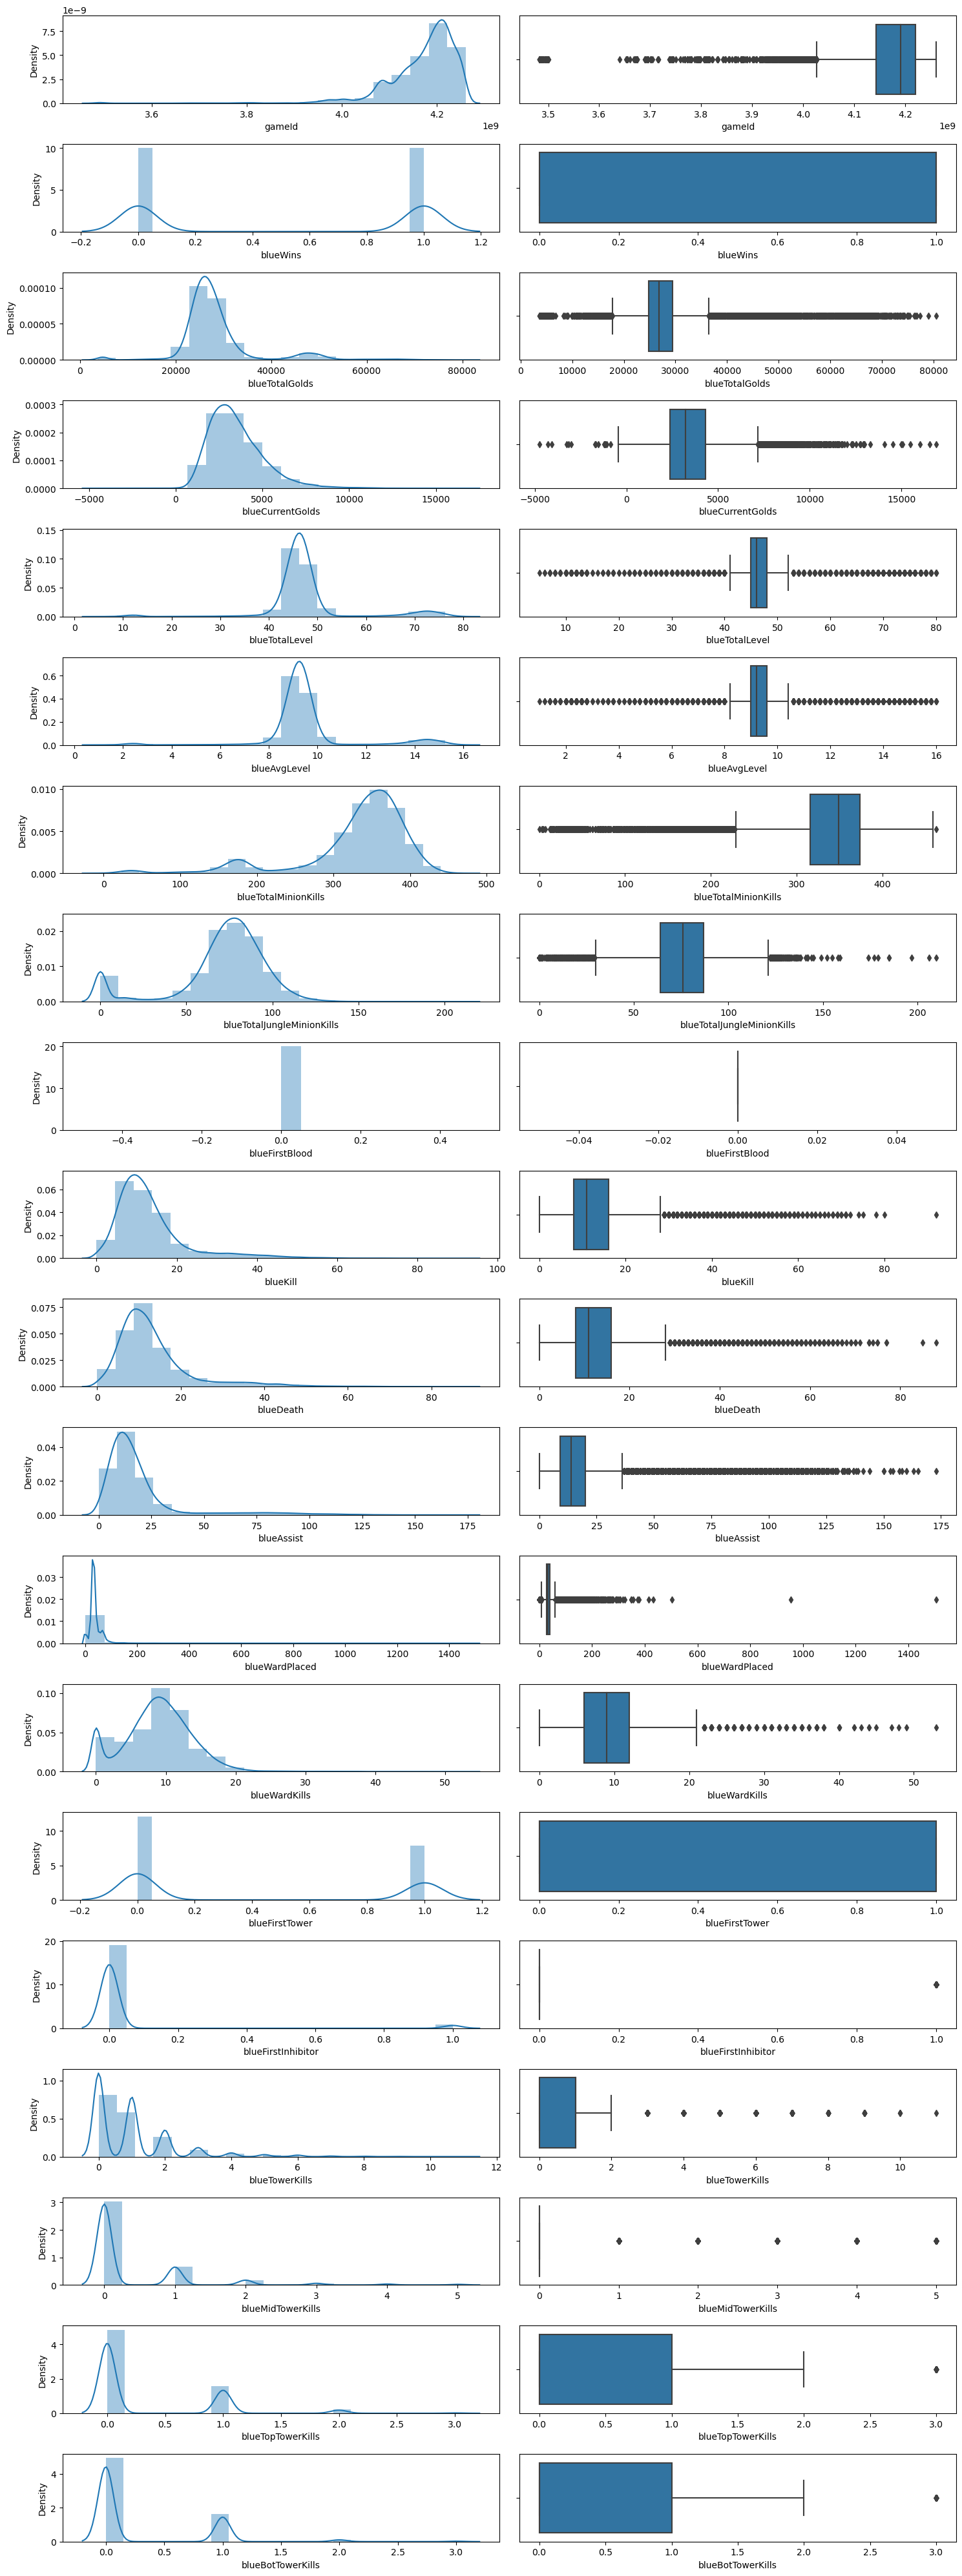

In [14]:
plot_distributions(df1_15min)

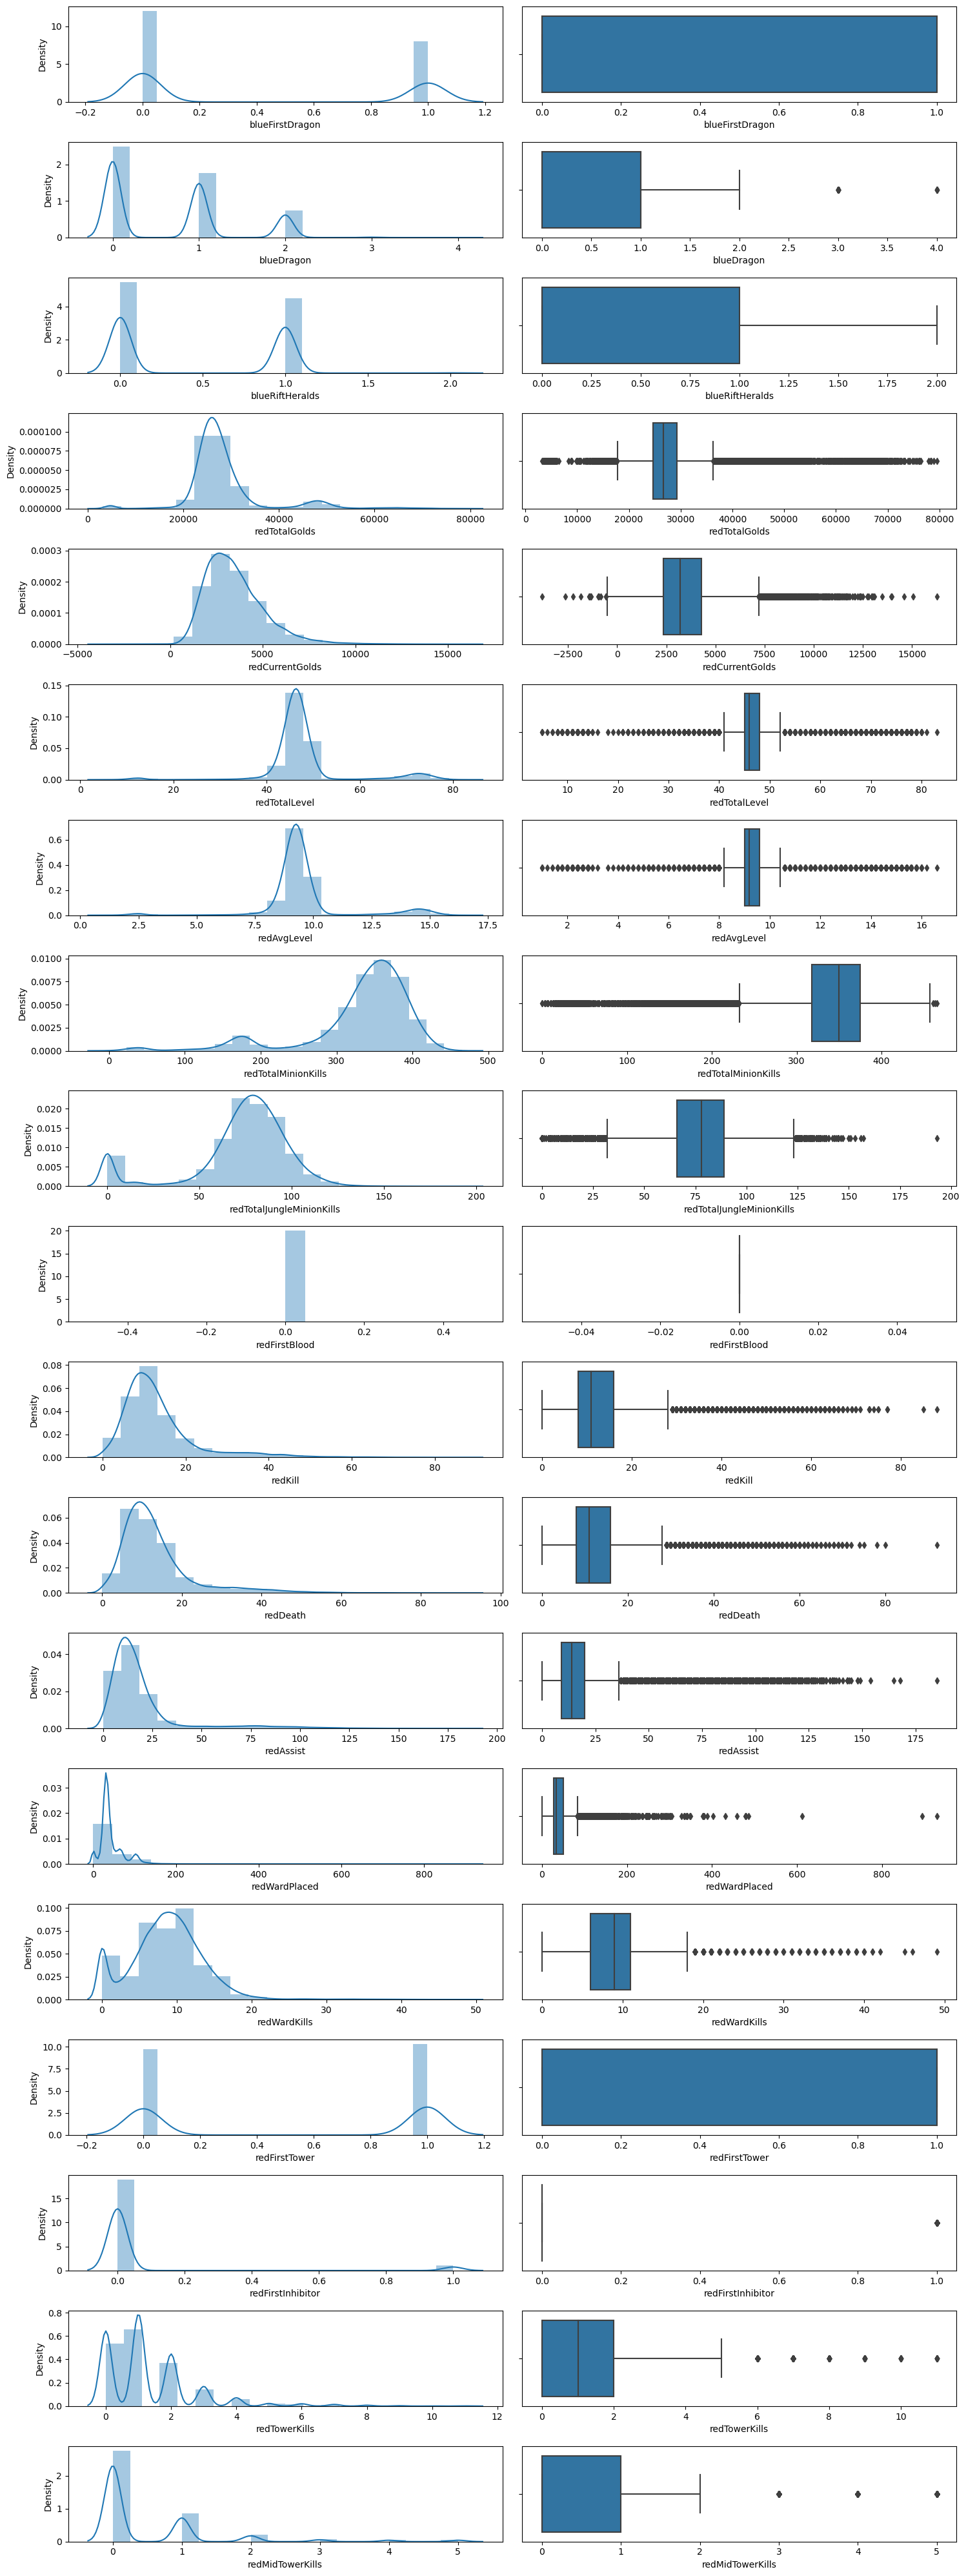

In [15]:
plot_distributions(df2_15min)

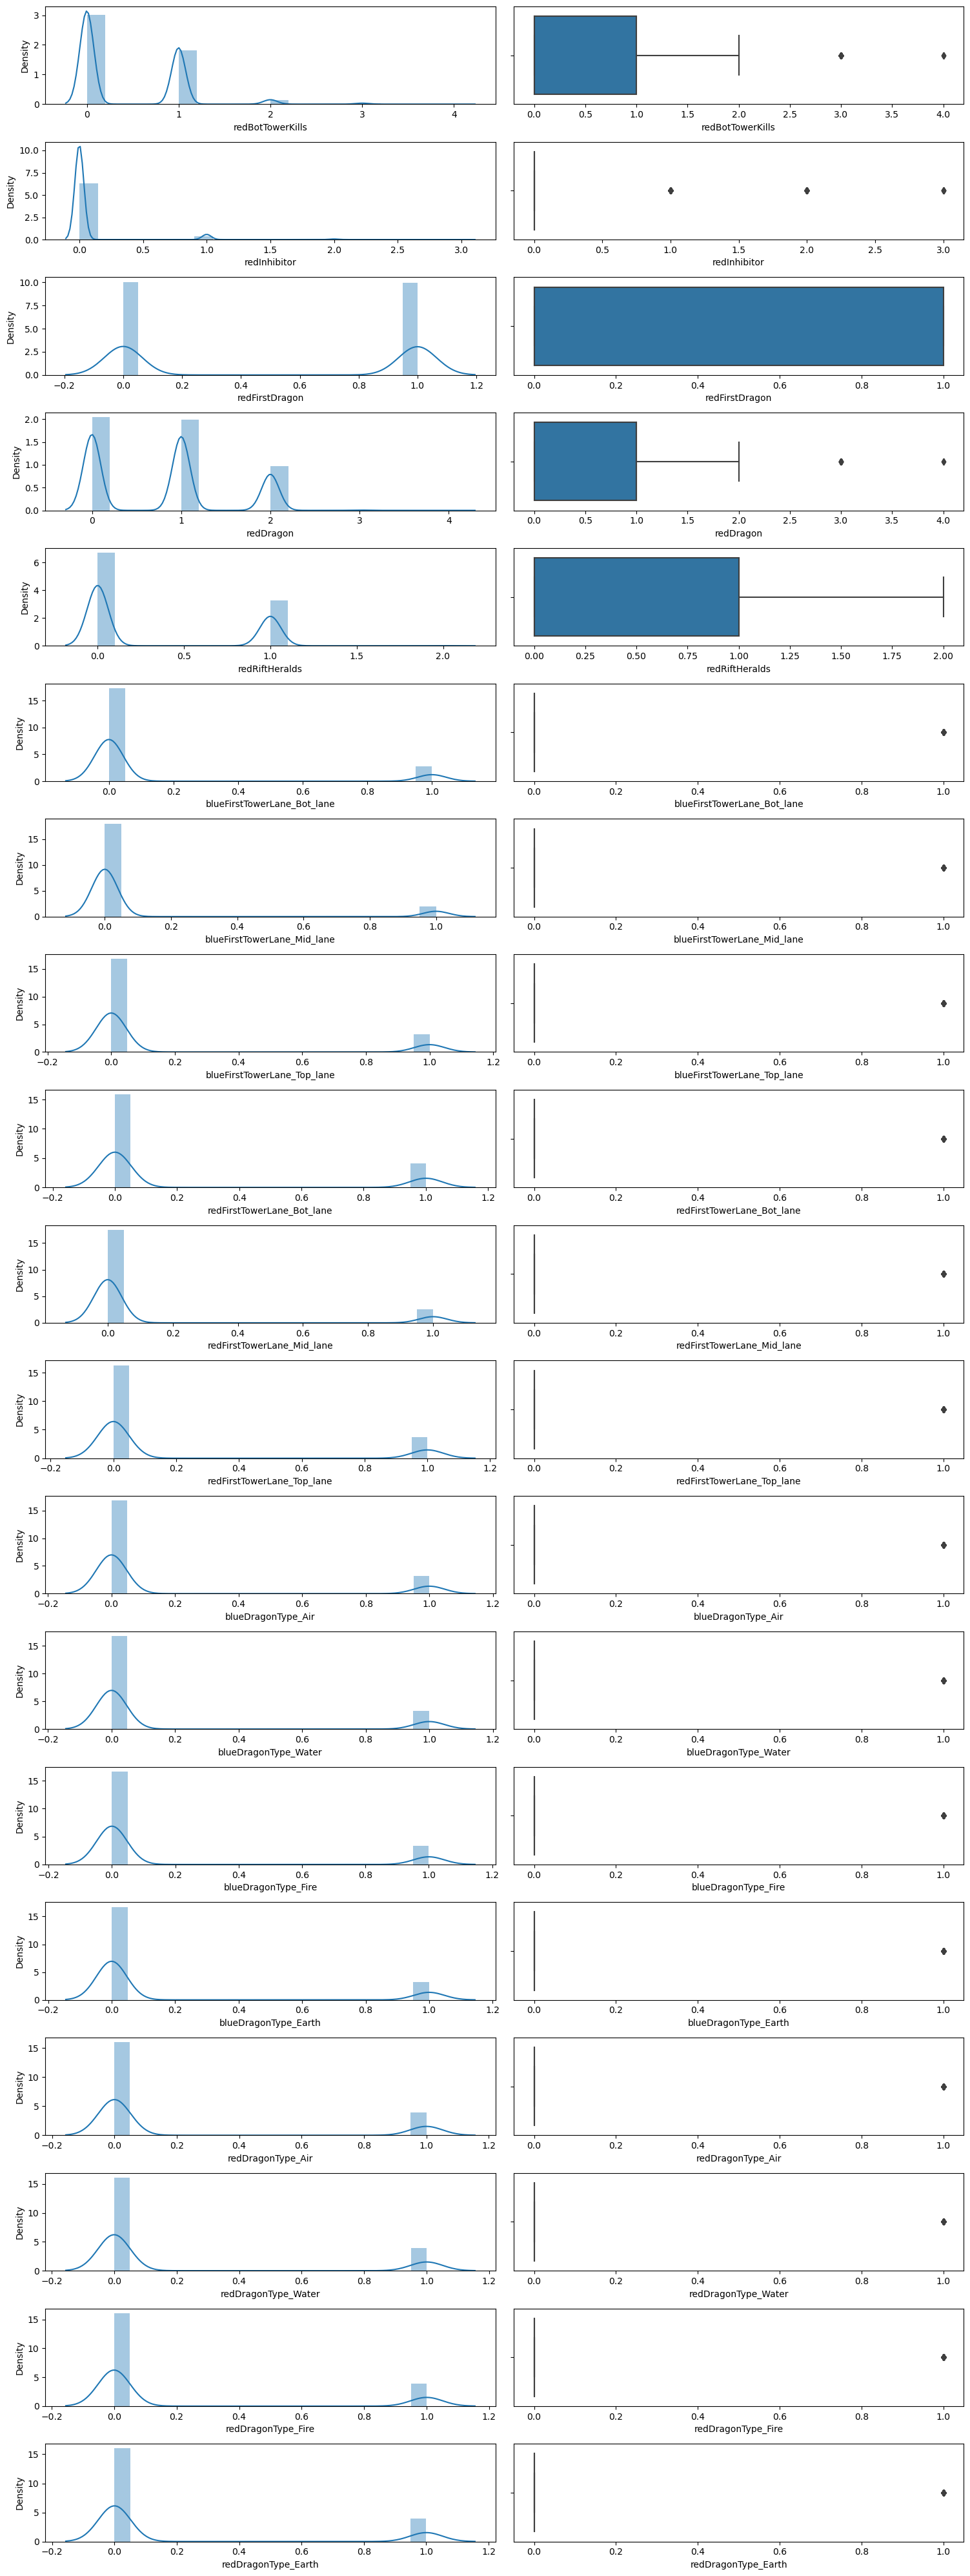

In [16]:
plot_distributions(df3_15min)

## Representación de los datos para las partidas de 10min

Se realizan algunas representación de los datos. Como se tienen muchas features, para esta representación se dividen los datos en tres grupos.

In [17]:
df1_10min = datos_10min.iloc[:,:20] # Select First 15 Columns
df2_10min = datos_10min.iloc[:,21:40] 
df3_10min = datos_10min.iloc[:,41:61] 

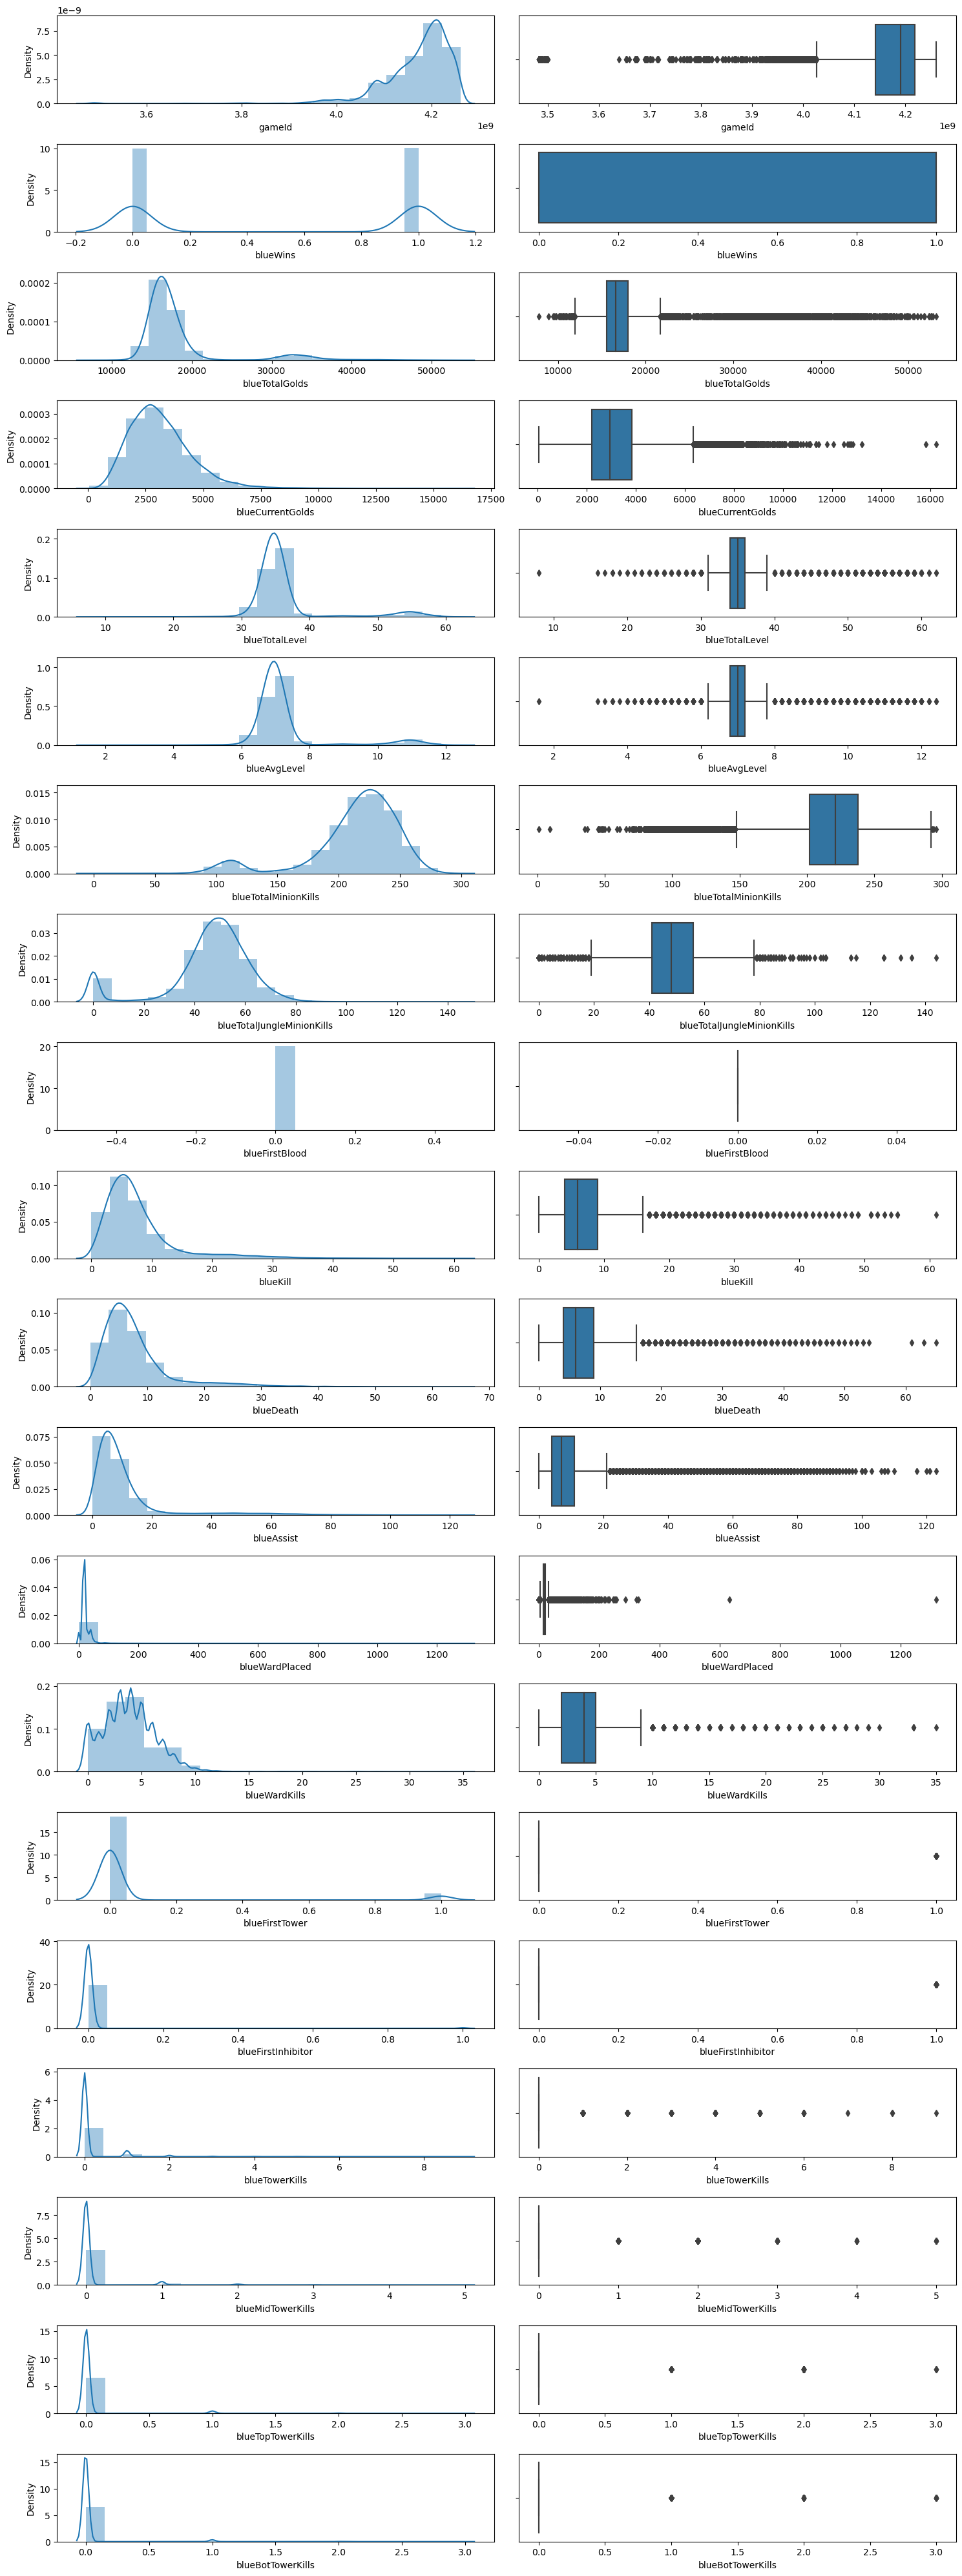

In [18]:
plot_distributions(df1_10min)

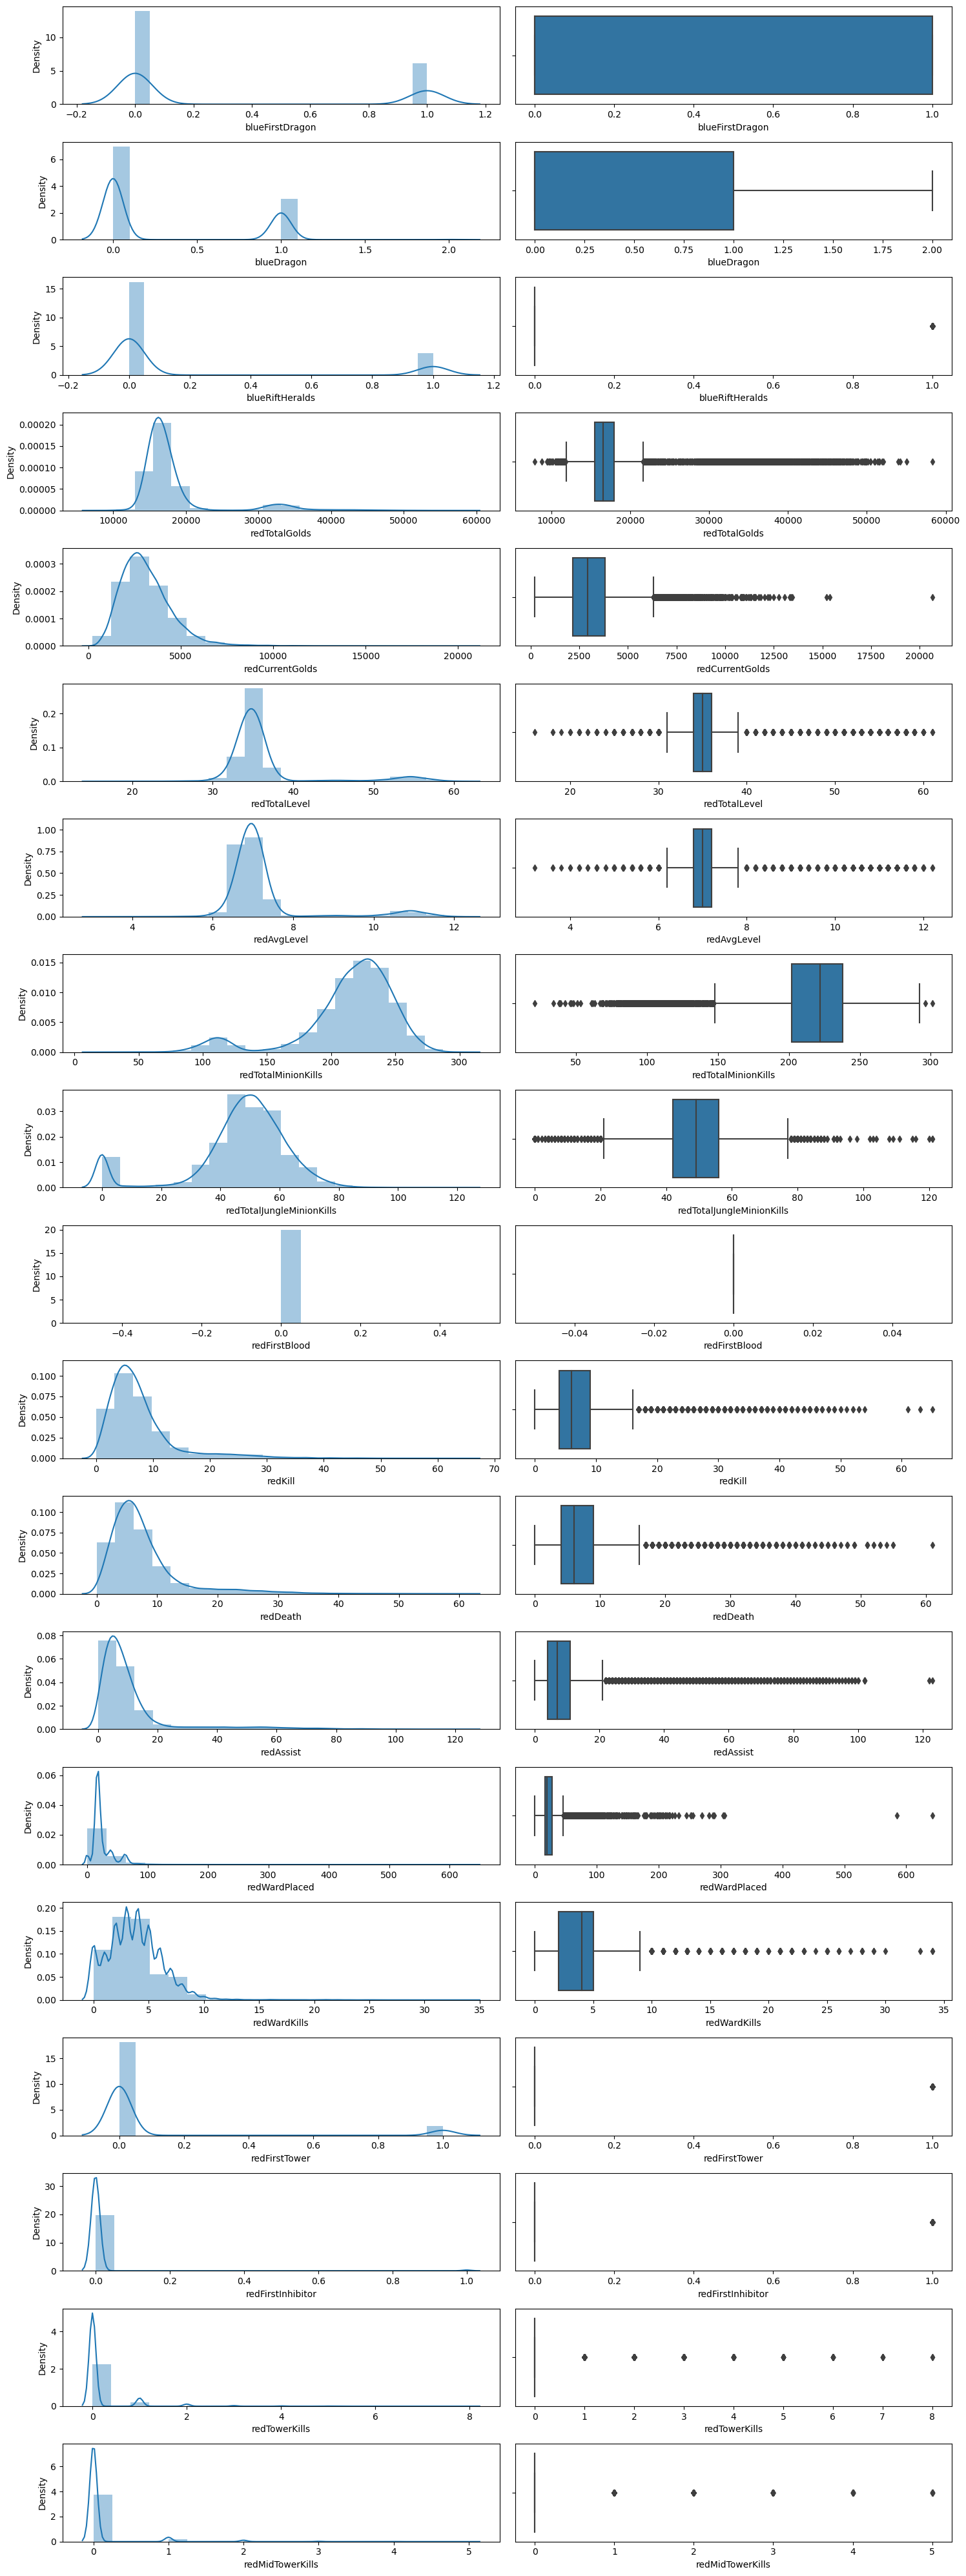

In [19]:
plot_distributions(df2_10min)

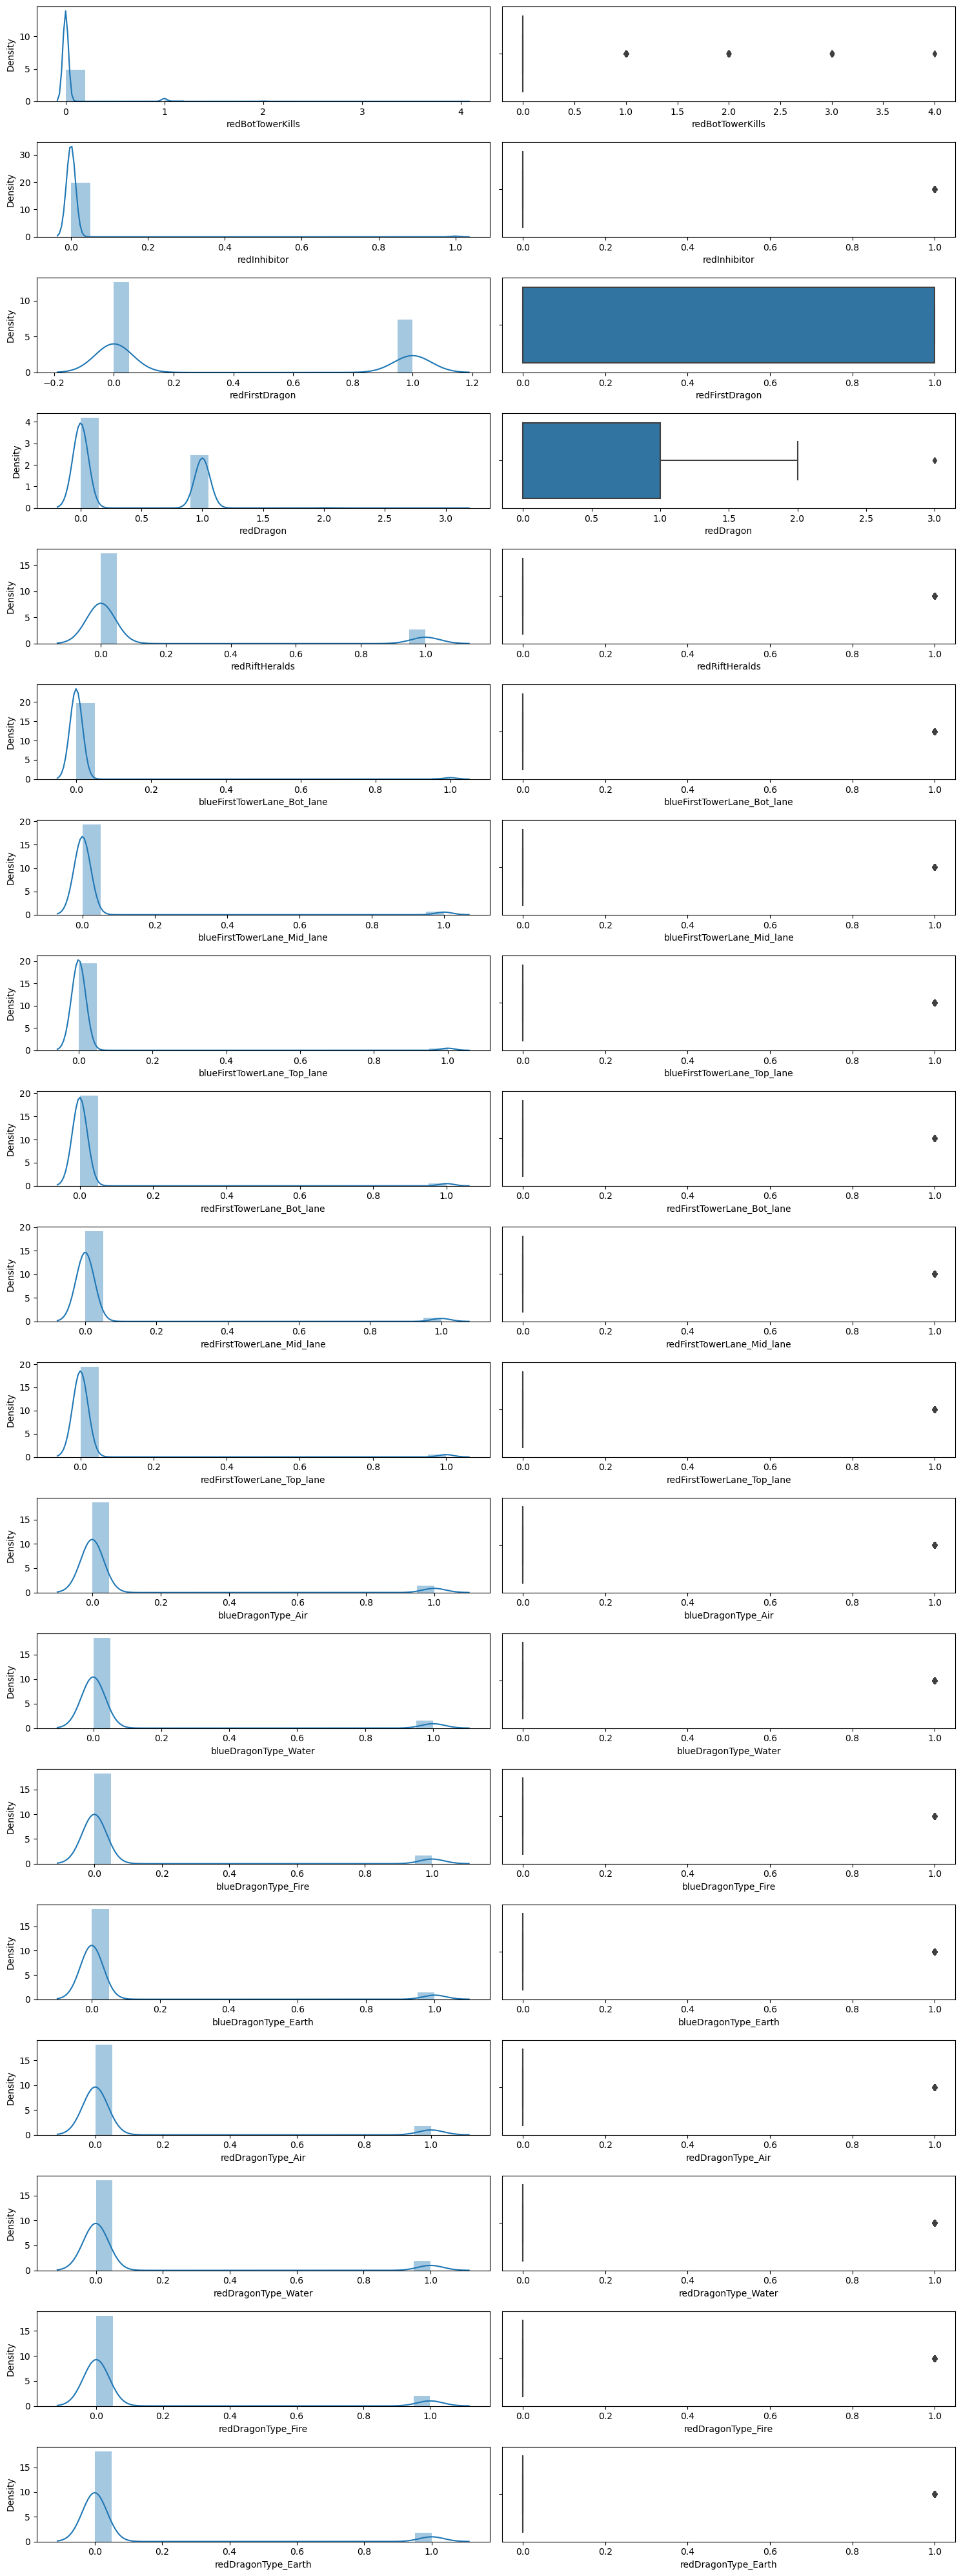

In [20]:
plot_distributions(df3_10min)

## Correlaciones de los datos

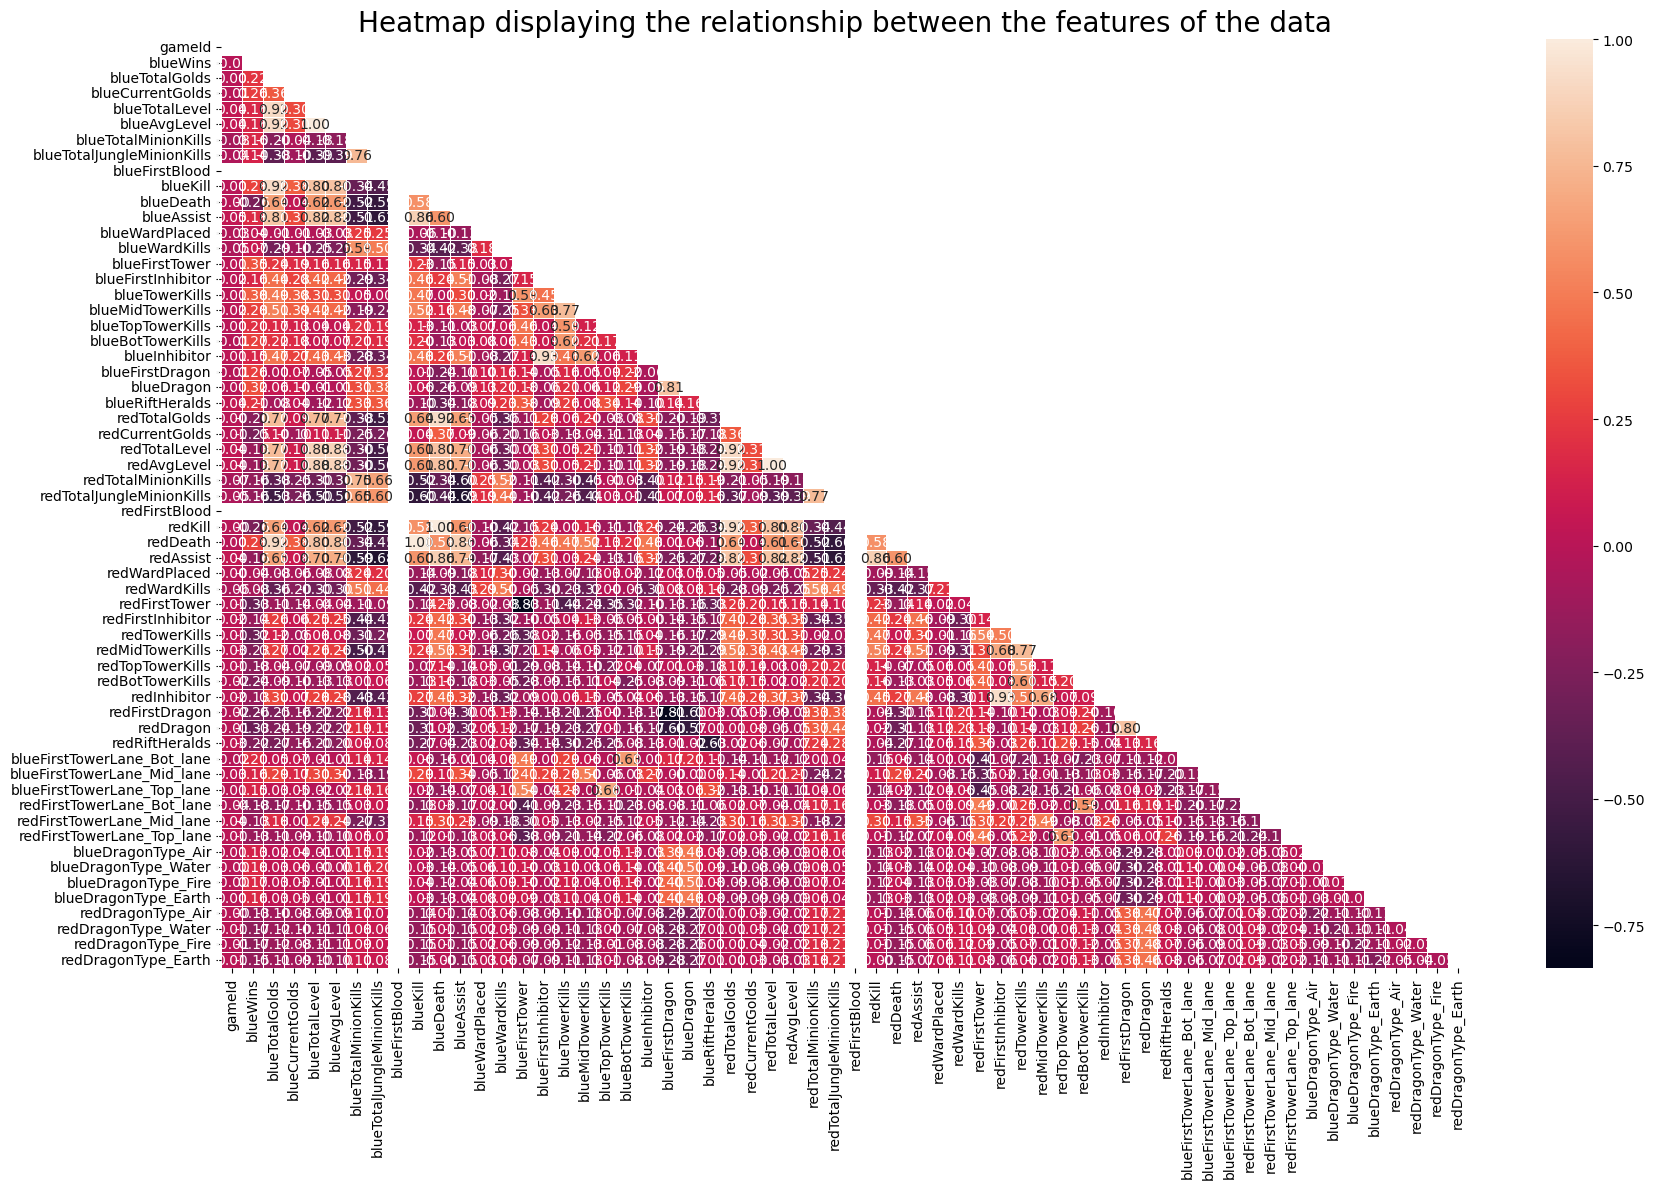

In [21]:
correlation_heatmap(datos_15min, limit = 0)

Como no se ve nada, se limita a aquellas columnas que tienen correlación de un valor de 0.3 o superior (en valor absoluto)

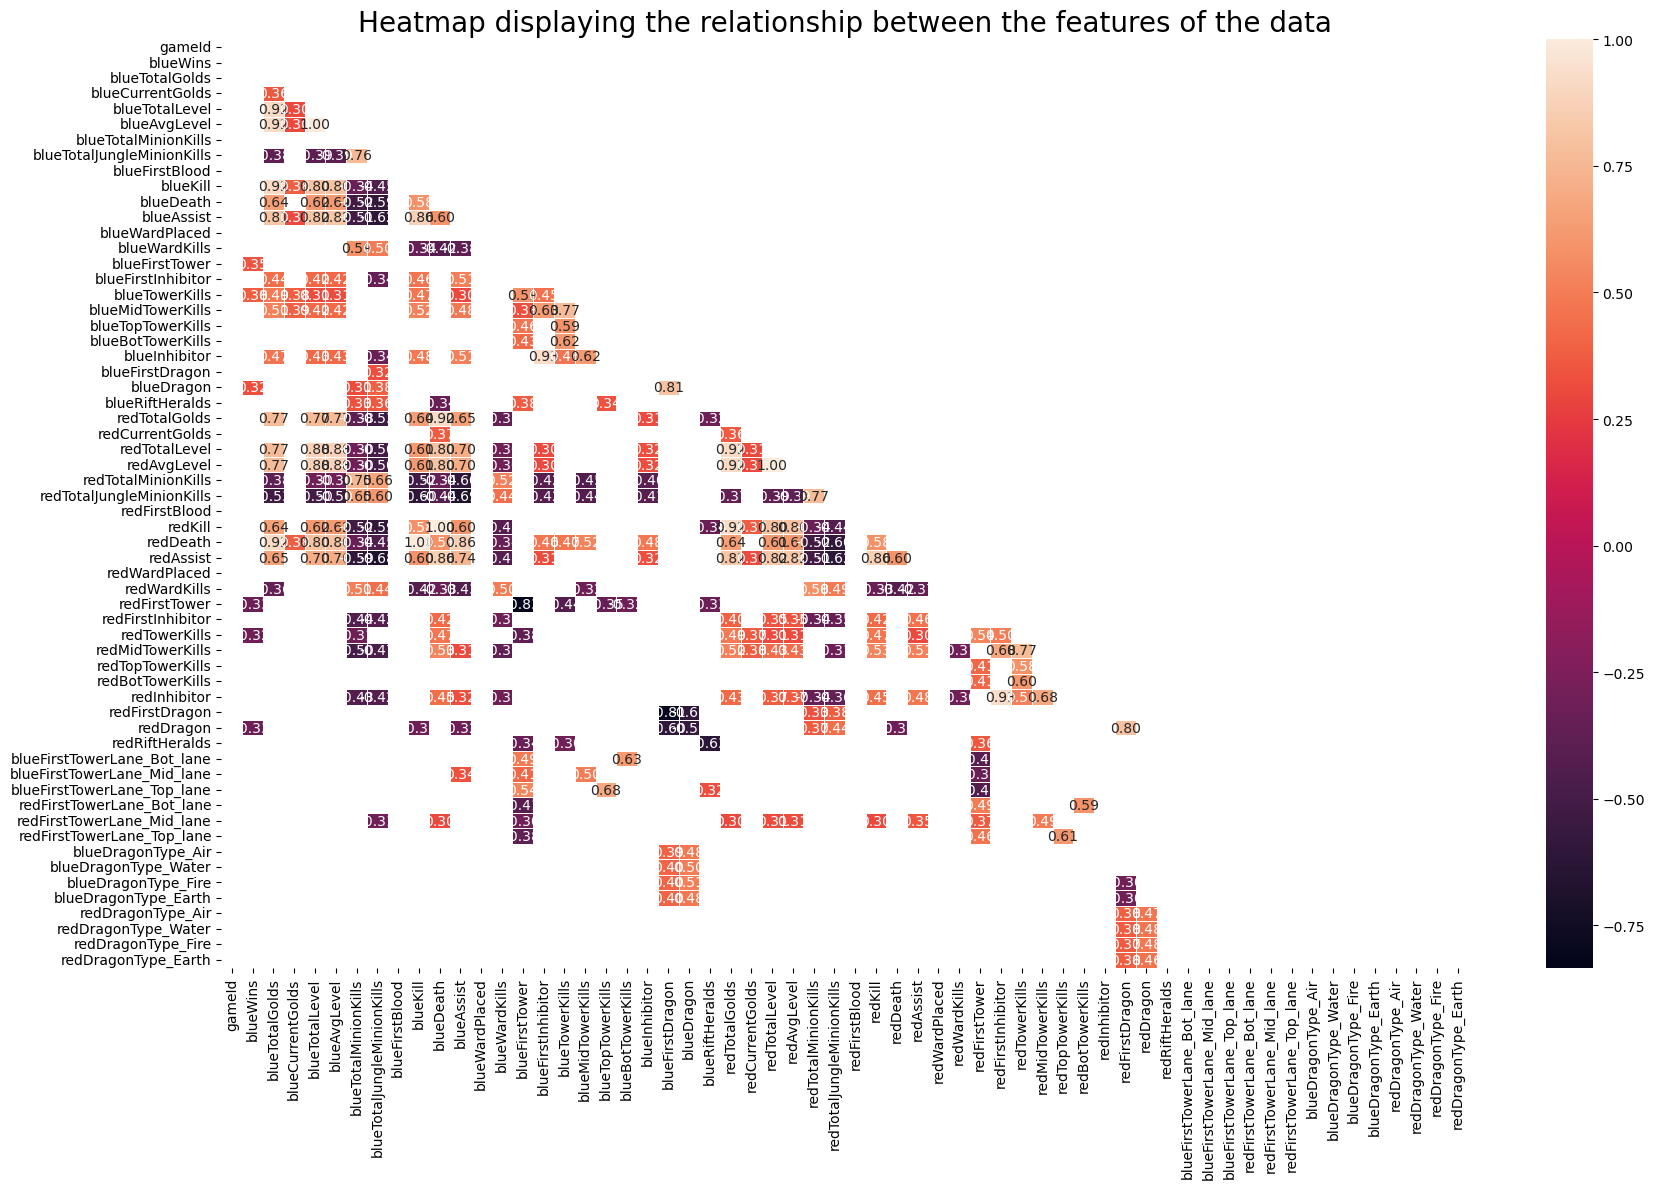

In [22]:
correlation_heatmap(datos_15min)

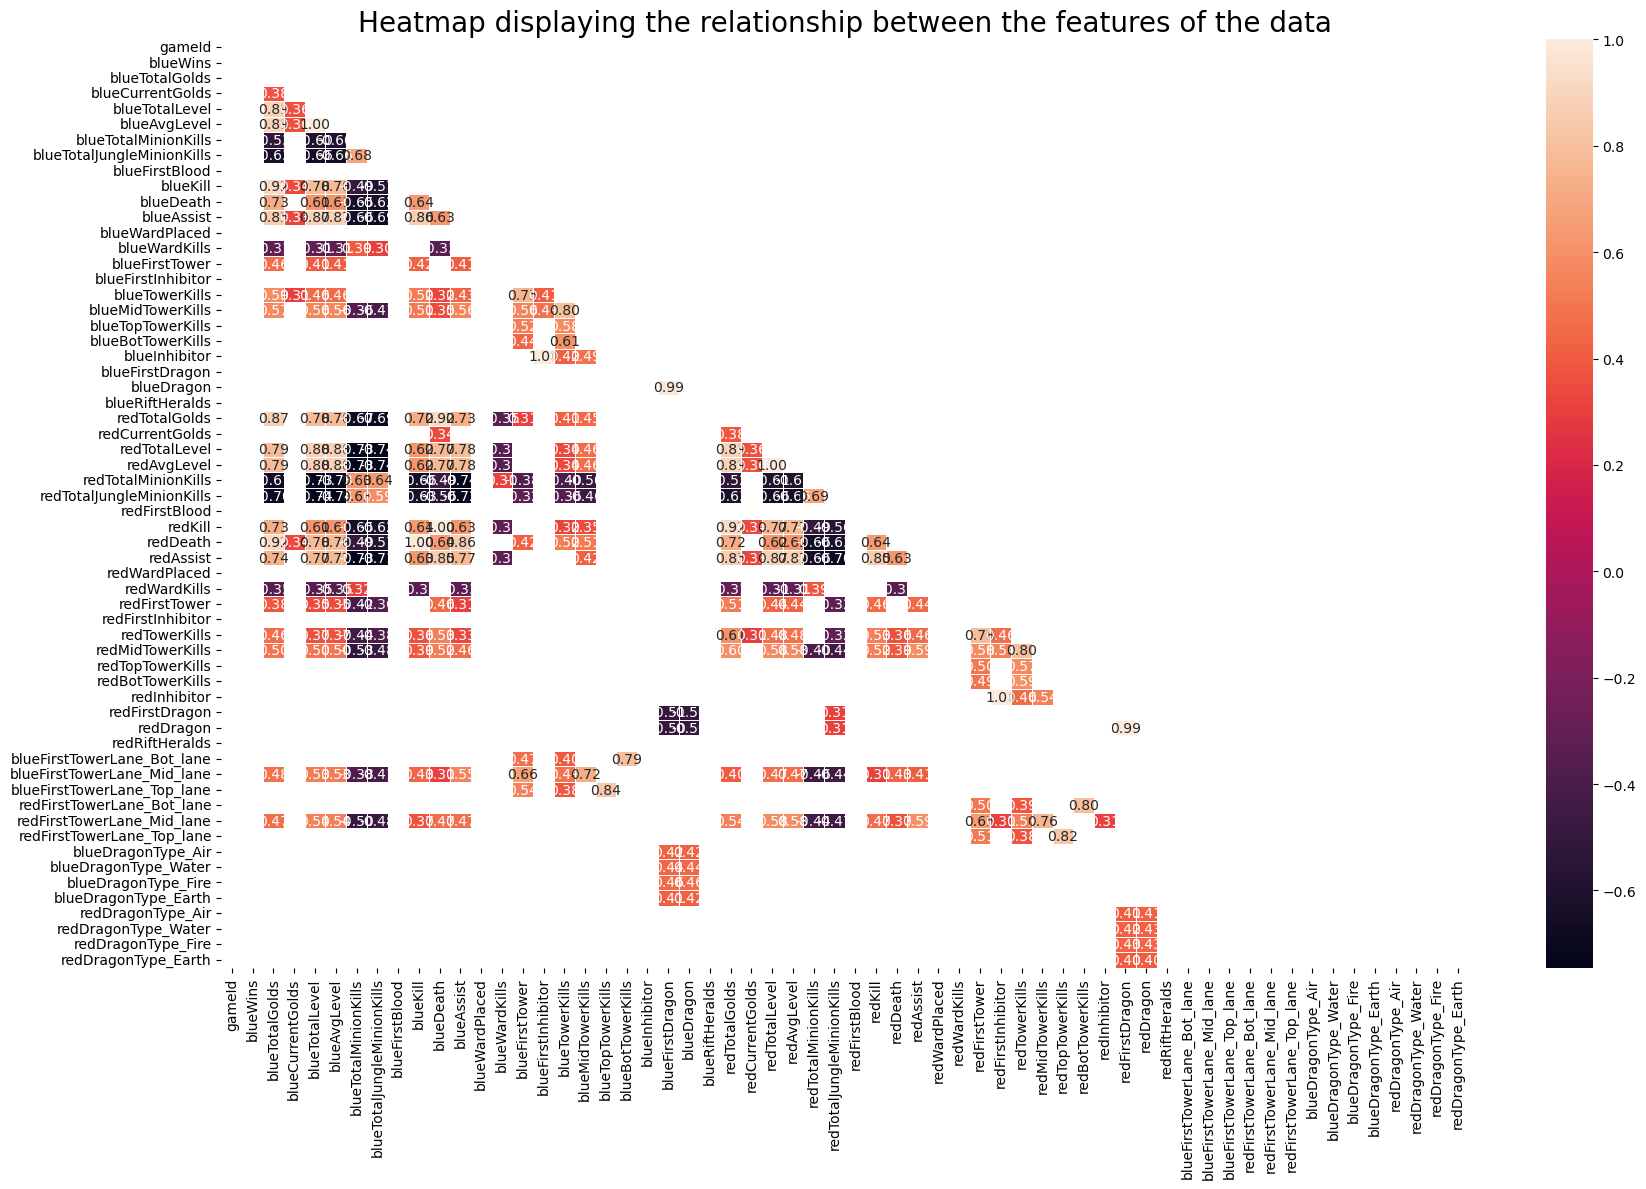

In [23]:
correlation_heatmap(datos_10min)

## Balanceo del Target
Hay que analizar si el target está balanceado o si en cambio hay que tener en cuenta un desbalanceo cuando se definan los modelos

In [24]:
datos_15min.blueWins.value_counts(normalize = True) #Está balanceada

1   0.50
0   0.50
Name: blueWins, dtype: float64

In [25]:
datos_10min.blueWins.value_counts(normalize = True) #Está balanceada

1   0.50
0   0.50
Name: blueWins, dtype: float64

# 5.3. Exportar datos procesados

Como los datos ya se han trabajo, para no estar repitiendo siempre el mismo proceso y poder optar por un código mucho más breve y sin limpieza de datos, se exportan los datos

In [26]:
#Se importan los datos
datos_15min.to_csv('../data/processed_data/Challenger_Ranked_Games_15minute_processed.csv')
datos_10min.to_csv('../data/processed_data/Challenger_Ranked_Games_10minute_processed.csv')

# 5.4. Primera división de los datos
Una vez se tienen los datos preparados, se puede hacer una primera división.

Como la cantidad de datos es grande, de los datos de partida se pueden crear 2 grupos, uno de "trabajo" que se dividirá luego en train y test y otro grupo que sea para validación final.

La distribución de los datos sería 60% train, 20% test y 20% validación.

Para hacer esta separación de los datos de validación se utiliza la función `dividir_datos` que ya hace todas las separaciones, devolviendo los datos separados en train, test y validacion para la X y la y

Se vuelve a aplicar un split para obtener ahora sí, los datos de train y test.

In [27]:
X_train_15min, X_test_15min, y_train_15min, y_test_15min, X_val_15min, y_val_15min = dividir_datos(datos_15min)
X_train_10min, X_test_10min, y_train_10min, y_test_10min, X_val_10min, y_val_10min = dividir_datos(datos_10min)

In [28]:
print("-------Partidas 15 min---------")
print("-------------------------------")
print("Datos en bruto:", len(datos_15min))
print("-------------------------------")
print("Datos de entrenamiento:", len(X_train_15min))
print("-------------------------------")
print("Datos de validación:", len(X_val_15min))
print("-------------------------------")

print("\n")
print("-------Partidas 10 min---------")
print("-------------------------------")
print("Datos en bruto:", len(datos_10min))
print("-------------------------------")
print("Datos de entrenamiento:", len(X_train_10min))
print("-------------------------------")
print("Datos de validación:", len(X_val_10min))
print("-------------------------------")

-------Partidas 15 min---------
-------------------------------
Datos en bruto: 26834
-------------------------------
Datos de entrenamiento: 17173
-------------------------------
Datos de validación: 5367
-------------------------------


-------Partidas 10 min---------
-------------------------------
Datos en bruto: 26409
-------------------------------
Datos de entrenamiento: 16901
-------------------------------
Datos de validación: 5282
-------------------------------


# 6. Modelo 

El modelo que mejor resultado ha dado en train, test y validación ha sido un **RandomForest** con los datos sin tratamiento especial.

Es cierto que hay varios modelos muy similares en cuanto a los resultados, pero por rapidez se ha optado por el RandomForest.

Todas las pruebas de los modelos utilizados, así como con los diferentes tratamientos aplicados a los datos están en el Notebook *"Proyecto ML - Resumido usando clases"*

Tambien se han empleado redes neuronales pero el resultado obtenido no ha sido mejor. Estas pruebas están en el Notebook *Proyecto ML - Usando Redes Neuronales"*

In [29]:
#Se crean los objetos
partidas_15min = Models(X_train_15min, X_test_15min, y_train_15min, y_test_15min)
partidas_10min = Models(X_train_10min, X_test_10min, y_train_10min, y_test_10min)

### Partidas 15 min

Hora de inicio:  21:34:07
Hora de fin:  21:34:16
-------------------------
Accuracy train 1.0
Accuracy test 0.807638565440149
-------------------------
-------------------------
Matriz de confusión


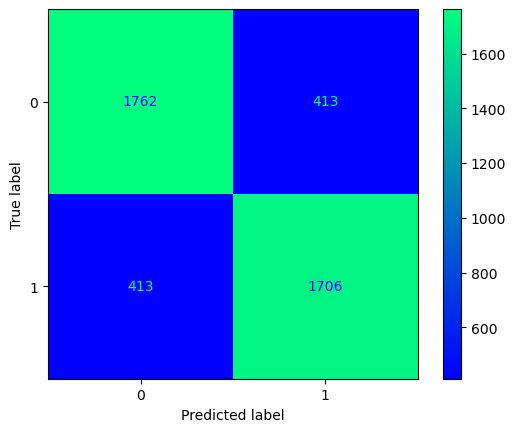

-------------------------
-------------------------
Report
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      2175
           1       0.81      0.81      0.81      2119

    accuracy                           0.81      4294
   macro avg       0.81      0.81      0.81      4294
weighted avg       0.81      0.81      0.81      4294

-------------------------


In [30]:
modelo_entrenado_15min, pred_train_15min, pred_test_15min, Accuracy_train_15min, Accuracy_test_15min = partidas_15min.randomforest()

In [31]:
Accuracy_val_15min = Models.predecir_validacion(modelo_entrenado_15min,X_val_15min,y_val_15min)

Accuracy validación 0.8082727780883175


In [32]:
guardar_modelo(modelo_entrenado_15min,"randomforest_15min")

### Partidas 10 min

Hora de inicio:  21:34:19
Hora de fin:  21:34:27
-------------------------
Accuracy train 1.0
Accuracy test 0.7411263606247042
-------------------------
-------------------------
Matriz de confusión


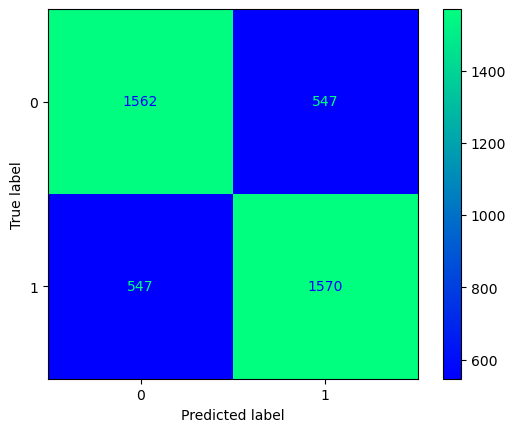

-------------------------
-------------------------
Report
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      2109
           1       0.74      0.74      0.74      2117

    accuracy                           0.74      4226
   macro avg       0.74      0.74      0.74      4226
weighted avg       0.74      0.74      0.74      4226

-------------------------


In [33]:
modelo_entrenado_10min, pred_train_10min, pred_test_10min, Accuracy_train_10min, Accuracy_test_10min = partidas_10min.randomforest()

In [34]:
Accuracy_val_10min = Models.predecir_validacion(modelo_entrenado_10min,X_val_10min,y_val_10min)

Accuracy validación 0.7340022718667172


In [35]:
guardar_modelo(modelo_entrenado_15min,"randomforest_10min")